# Diabetes Prediction using Classification Algorithm Scikit Learn

The objective of this project is to predict whether a patient have diabetes or not using the features given in the dataset.

## Data Description

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Number of Instances: 768 <br>
Number of Attributes: 8 plus class <br>
For Each Attribute: (all numeric-valued)

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Outcome:** Class variable (0 or 1)

## 1. Import the important Libraries

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

## 2. Loading the Dataset

In [3]:
diabetes = pd.read_csv("diabetes.csv")

## 3. Inspecting the Dataset

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Data Preprocessing

By inspection, dataset has no missing values. Let's check out for Duplicates and Outliers.

In [7]:
diabetes = diabetes.drop_duplicates()

#### 4.1 Outliers
Checking for outliers using the box plot.

In [1]:
#first store the features in a seperate dataframe.
features = diabetes.drop("Outcome",axis = 1).copy()
#Now plot a boxplot to identify the outliers in our features.
sns.boxplot(data = features, orient = 'h', palette = 'Set1', linewidth = 2.5 )
plt.title("Features Box Plot")

NameError: name 'diabetes' is not defined

Our features contain so many outliers. Let's check our target column for outliers using the boxplot.

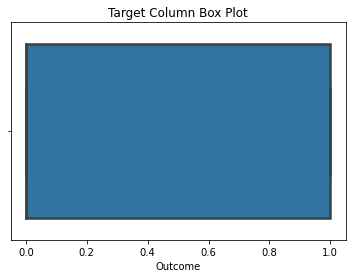

In [9]:
sns.boxplot(x = diabetes["Outcome"], orient = 'h', linewidth = 2.5 )
plt.title("Target Column Box Plot")
plt.show()

Our target column does not contain outliers. Now let's treat our feature columns for outliers.

#### 4.2 Removing Outliers from Numerical feature columns

In [10]:
from scipy import stats
def removeoutliers(df=None, columns=None):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        floor, ceil = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df[column] = df[column].clip(floor, ceil)
        print(f"The columnn: {column}, has been treated for outliers.\n")
    return df
diabetes = removeoutliers(diabetes,[col for col in features.columns])

The columnn: Pregnancies, has been treated for outliers.

The columnn: Glucose, has been treated for outliers.

The columnn: BloodPressure, has been treated for outliers.

The columnn: SkinThickness, has been treated for outliers.

The columnn: Insulin, has been treated for outliers.

The columnn: BMI, has been treated for outliers.

The columnn: DiabetesPedigreeFunction, has been treated for outliers.

The columnn: Age, has been treated for outliers.



Text(0.5, 1.0, 'Box Plot after treating outliers')

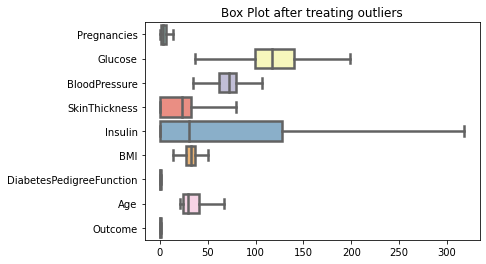

In [ ]:
sns.boxplot(data = diabetes, orient = 'h', palette = 'Set2', linewidth = 2.5 )
plt.title("Box Plot after treating outliers")

The Data Cleaning part is done here. Now we will move to Exploratory Data Analysis part.

## 5. Exploratory Data Analysis

#### 5.1 Distribution of our dataset columns

In this section we will plot the distribution of each column and see which column has uniform distribution,skew or semi skewed distributions.

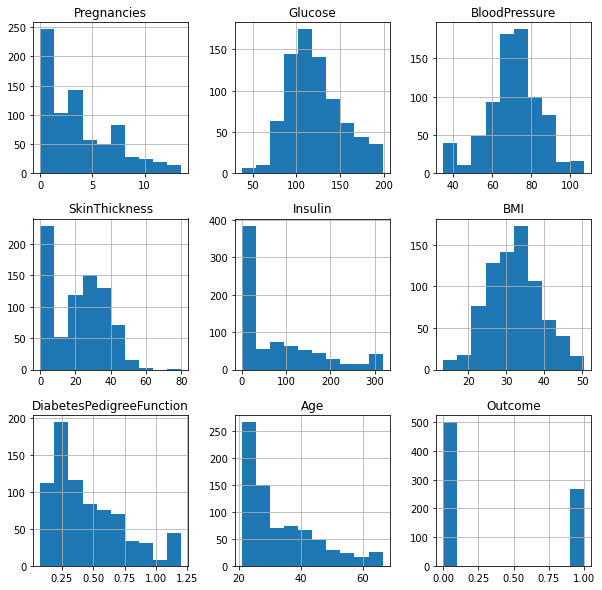

In [12]:
diabetes.hist(bins = 10, figsize = (10,10))
plt.show()

We can see that the Glucose, Blood Pressure, and BMI columns have the normal distribution while the rest have skewed distributions.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

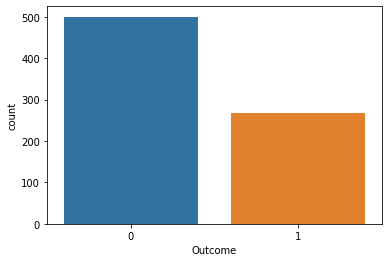

In [13]:
sns.countplot('Outcome',data=diabetes)

Our Outcome column is inbalanced. The number of people that don't have diabetes are in higher ratio than the number of people that have diabetes. We can calculate the ratio using the following method.

In [14]:
print('Outcome Class Ratio:',sum(diabetes['Outcome'])/len(diabetes['Outcome']))

Outcome Class Ratio: 0.3489583333333333


#### 5.2 Checking the Correlation of columns with each other

<AxesSubplot:>

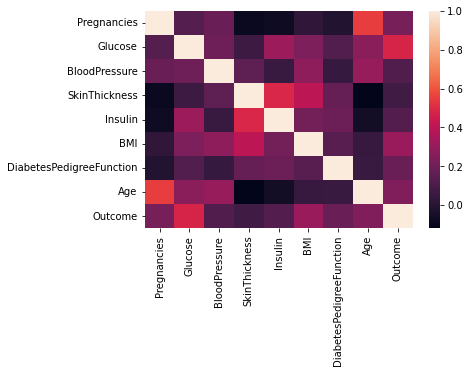

In [15]:
#plot the heatmap
sns.heatmap(diabetes.corr())

From the heatmap, we can see that the Glucose column has the strongest correlation with our target column.

## 6. Preparing the Data for Model Building

Now since we have cleaned and explored out data, we can now build up our model.

#### 6.1 Remove the target column from the dataset

In [16]:
y = diabetes.loc[:,'Outcome']
X = diabetes.drop(['Outcome'],axis = 1).copy()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


## 7. Building the Classification Model

In [17]:
from sklearn.svm import SVC
svc = SVC()

#### 7.1 Hypertuning the Model

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
grid = [{'kernel':['poly'],'degree':[2,3,4]},{'kernel':['linear','rbf'],'C':[10,100]}]
scoring = make_scorer(accuracy_score)
svm_model = GridSearchCV(svc,param_grid=grid,cv=5,scoring=scoring)
svm_model.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'degree': [2, 3, 4], 'kernel': ['poly']},
                         {'C': [10, 100], 'kernel': ['linear', 'rbf']}],
             scoring=make_scorer(accuracy_score))

In [19]:
svm_model.best_params_

{'C': 100, 'kernel': 'linear'}

In [20]:
svm_model.best_score_

0.7670146846617435

In [21]:
svm_best_model = GridSearchCV(svc,param_grid =[{'C': [100], 'kernel': ['linear']}],cv=5,scoring=scoring)

In [22]:
svm_best_model.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [100], 'kernel': ['linear']}],
             scoring=make_scorer(accuracy_score))

In [23]:
svm_best_model.best_score_

0.7670146846617435

## 8. Saving the model using Pickle

In [2]:
import pickle
pickle.dump(svm_best_model, open('diabete.pickles', 'wb'))

NameError: name 'svm_best_model' is not defined

## 9. Model Deployement using DASH

The model is deployed using Plotly Dash.